## Observations and Insights

### Summary Analysis
    
    # 1. Based on the bar chart showing number of data points for each treatment regimen,
    #    Capomulin and Ramicane produced the least amount of mouse loss as compared to 
    #    the other drug regimens.
    
    # 2. Based on the pie chart showing the distribution of female versus male mice, the
    #    population count used for both genders is about equal, albeit a slightly larger
    #    population of male mice were used in the study.
    
    # 3. Based on the box and whiskers plot, Ramicane produced the lowest mean final tumor 
    #    volume and Propriva produced the highest mean final tumor volume. Although, no
    #    outliers were produced between the four most viable drug regimens tested. (But,
    #    this could have resulted from me selecting one of the drug regimens incorrectly.
    #    I used Propriva here instead of what was discussed in the slack, Infubinol. I
    #    still don't understand why that is included in the top 4 most viable drug regimens
    #    so I stuck with the four that I chose based on average tumor size given in one of
    #    the tables.)
  
    # 4. Based on the line chart, Capomulin is the most viable drug regimen. Therefore, 
    #    if we use the Capomulin data to run a regression correction, the result indicates
    #    the correlation between mouse weight and tumor volumne is 0.84, which is a high
    #    correlation, meaning weight has a significant impact on the result of the tumor
    #    volume. This indicates that the higher the weight of the mouse, the less effective
    #    the drug regimen has on reducing the tumor.

## Dependencies and starter code

In [1]:
# You've been given access to the complete data from Pymaceuticals' most recent animal study. 
# In this study, 250 mice identified with SCC tumor growth were treated through a variety of drug regimens. 
# Over the course of 45 days, tumor development was observed and measured. 
# The purpose of this study was to compare the performance of Pymaceuticals' drug of interest, Capomulin, 
    # versus the other treatment regimens.
# You have been tasked by the executive team to generate all of the tables and figures needed for the technical report
    # of the study.
# The executive team also has asked for a top-level summary of the study results. 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

In [3]:
# Note to self:
    # 1. Mouse csv file (249 rows of data):
        # 5 columns of data: Mouse ID, Drug Regimen, Sex, Age_months, Weight (g)
    # 2. Study_results csv file (1893 rows of data):
        # 4 columns of data: Mouse ID, Timepoint, Tumor Volume (mm3), Metastatic Sites
# Common column: Mouse ID

In [4]:
# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

In [5]:
# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

In [6]:
# Combine the data into a single dataset
mouse_study_combine = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")

In [7]:
# Display table
mouse_study_combine.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


## Summary statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume 
    # for each regimen.

mean = mouse_study_combine.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
median = mouse_study_combine.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
variance = mouse_study_combine.groupby('Drug Regimen').var()['Tumor Volume (mm3)'] 
standard_deviation = mouse_study_combine.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
SEM = mouse_study_combine.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']

summary_statistics_table = pd.DataFrame({"Tumor Volume Mean": mean,
                              "Tumor Volume Median": median,
                              "Tumor Volume Variance": variance,
                              "Tumor Volume Std. Dev.": standard_deviation,
                              "Tumor Volume SEM": SEM})
summary_statistics_table    

,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

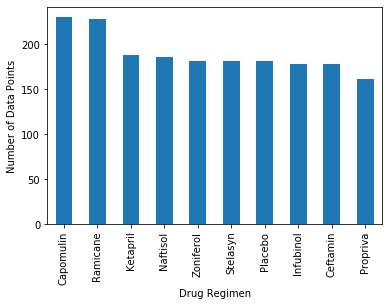

In [9]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
number_of_data_points = mouse_study_combine['Drug Regimen'].value_counts()
number_of_data_points.plot.bar(number_of_data_points)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")
plt.show()

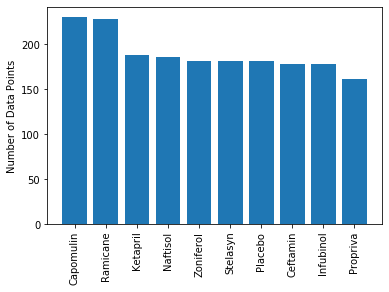

In [10]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
number_of_data_points = mouse_study_combine['Drug Regimen'].value_counts()
x = ['Capomulin', 'Ramicane', 'Ketapril', 'Naftisol', 'Zoniferol', 'Stelasyn',
    'Placebo', 'Ceftamin', 'Infubinol', 'Propriva']
plt.bar(x, number_of_data_points)
plt.ylabel("Number of Data Points")
plt.xticks(rotation=90)
plt.show()

## Pie plots

In [11]:
# Preview mouse metadata
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


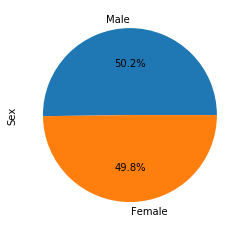

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
number_of_mice = mouse_metadata['Sex'].value_counts()
number_of_mice.plot(kind='pie', fontsize=10, autopct='%1.1f%%')
plt.show()

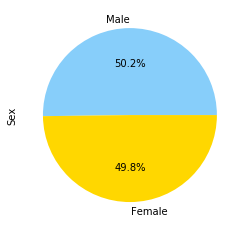

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
number_of_mice = mouse_metadata['Sex'].value_counts()
labels = 'Male', 'Female'
percentages = [50.2, 49.8]
colors = ['lightskyblue', 'gold']
explode = (0,0)

plt.pie(percentages, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%')
plt.ylabel('Sex')
plt.show()

## Quartiles, outliers and boxplots

In [14]:
# Preview table
mouse_study_combine.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [15]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment 
    # regimens. Calculate the IQR (interquartile range, Q1, Q2, Q3) and quantitatively determine 
    # if there are any potential outliers.
final_tumor_volume = mouse_study_combine.groupby(['Mouse ID']).max()
final_tumor_volume = final_tumor_volume.reset_index()
final_tumor_volume

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
244,z435,10,48.710661,0,Propriva,Female,12,26
245,z578,45,45.000000,0,Ramicane,Male,11,16
246,z581,45,62.754451,3,Infubinol,Female,24,25
247,z795,45,65.741070,3,Naftisol,Female,13,29


In [16]:
# Merge dataframe with mouse_study_combine dataframe to view the data in one table
mouse_study_combine_with_final_tumor_volume = final_tumor_volume[['Mouse ID', 'Timepoint']].merge(mouse_study_combine,on=['Mouse ID','Timepoint'],how="left")

# Based on the mouse_study_combine table and the smallest average tumor volume by drug regimen
    # the most promising treatments are with Ramicane (avg. 40.2), Capomulin (avg. 40.6),
    # Propriva (avg. 52.3), Ceftamin (avg. 52.5)
Ramicane = mouse_study_combine_with_final_tumor_volume.loc[mouse_study_combine_with_final_tumor_volume["Drug Regimen"] == "Ramicane"]['Tumor Volume (mm3)']
Capomulin = mouse_study_combine_with_final_tumor_volume.loc[mouse_study_combine_with_final_tumor_volume["Drug Regimen"] == "Capomulin"]['Tumor Volume (mm3)']
Propriva = mouse_study_combine_with_final_tumor_volume.loc[mouse_study_combine_with_final_tumor_volume["Drug Regimen"] == "Propriva"]['Tumor Volume (mm3)']
Ceftamin = mouse_study_combine_with_final_tumor_volume.loc[mouse_study_combine_with_final_tumor_volume["Drug Regimen"] == "Ceftamin"]['Tumor Volume (mm3)']

mouse_study_combine_with_final_tumor_volume

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
244,z435,10,48.710661,0,Propriva,Female,12,26
245,z578,45,30.638696,0,Ramicane,Male,11,16
246,z581,45,62.754451,3,Infubinol,Female,24,25
247,z795,45,65.741070,3,Naftisol,Female,13,29


In [17]:
# Calculate the IQR (interquartile range, Q1, Q2, Q3) and quantitatively determine 
    # if there are any potential outliers.
    
# For Ramicane
# Determine quartiles
Ramicane_quartiles = Ramicane.quantile([.25,.5,.75])
Ramicane_lower_quartile = Ramicane_quartiles[0.25]
Ramicane_upper_quartile = Ramicane_quartiles[0.75]
Ramicane_iqr = Ramicane_upper_quartile-Ramicane_lower_quartile

# Determine upper and lower bounds
Ramicane_lower_bound = Ramicane_lower_quartile - (1.5*Ramicane_iqr)
Ramicane_upper_bound = Ramicane_upper_quartile + (1.5*Ramicane_iqr)

# Print a filtered dataframe of any outliers
Ramicane_outliers = Ramicane.loc[(Ramicane > Ramicane_upper_bound) | (Ramicane < Ramicane_lower_bound)]
Ramicane_outliers

Series([], Name: Tumor Volume (mm3), dtype: float64)

In [18]:
# For Capomulin
# Determine quartiles
Capomulin_quartiles = Capomulin.quantile([.25,.5,.75])
Capomulin_lower_quartile = Capomulin_quartiles[0.25]
Capomulin_upper_quartile = Capomulin_quartiles[0.75]
Capomulin_iqr = Capomulin_upper_quartile-Capomulin_lower_quartile

# Determine upper and lower bounds
Capomulin_lower_bound = Capomulin_lower_quartile - (1.5*Capomulin_iqr)
Capomulin_upper_bound = Capomulin_upper_quartile + (1.5*Capomulin_iqr)

# Print a filtered dataframe of any outliers
Capomulin_outliers = Capomulin.loc[(Capomulin > Capomulin_upper_bound) | (Capomulin < Capomulin_lower_bound)]
Capomulin_outliers

Series([], Name: Tumor Volume (mm3), dtype: float64)

In [19]:
# For Propriva
# Determine quartiles
Propriva_quartiles = Propriva.quantile([.25,.5,.75])
Propriva_lower_quartile = Propriva_quartiles[0.25]
Propriva_upper_quartile = Propriva_quartiles[0.75]
Propriva_iqr = Propriva_upper_quartile-Propriva_lower_quartile

# Determine upper and lower bounds
Propriva_lower_bound = Propriva_lower_quartile - (1.5*Propriva_iqr)
Propriva_upper_bound = Propriva_upper_quartile + (1.5*Propriva_iqr)

# Print a filtered dataframe of any outliers
Propriva_outliers = Propriva.loc[(Propriva > Propriva_upper_bound) | (Propriva < Propriva_lower_bound)]
Propriva_outliers

Series([], Name: Tumor Volume (mm3), dtype: float64)

In [20]:
# For Ceftamin
# Determine quartiles
Ceftamin_quartiles = Ceftamin.quantile([.25,.5,.75])
Ceftamin_lower_quartile = Ceftamin_quartiles[0.25]
Ceftamin_upper_quartile = Ceftamin_quartiles[0.75]
Ceftamin_iqr = Ceftamin_upper_quartile-Ceftamin_lower_quartile

# Determine upper and lower bounds
Ceftamin_lower_bound = Ceftamin_lower_quartile - (1.5*Ceftamin_iqr)
Ceftamin_upper_bound = Ceftamin_upper_quartile + (1.5*Ceftamin_iqr)

# Print a filtered dataframe of any outliers
Ceftamin_outliers = Ceftamin.loc[(Ceftamin > Ceftamin_upper_bound) | (Ceftamin < Ceftamin_lower_bound)]
Ceftamin_outliers

Series([], Name: Tumor Volume (mm3), dtype: float64)

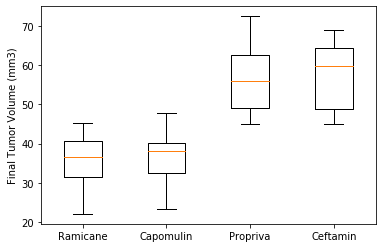

In [27]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
final_tumor_volume_boxplot = dict(markerfacecolor='red',markersize=12)
plt.boxplot([Ramicane,Capomulin,Propriva,Ceftamin],labels=['Ramicane','Capomulin','Propriva','Ceftamin'],flierprops=boxplot)
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()


In [ ]:
# My results did not produce any outliers.

## Line and scatter plots

In [28]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

# Filter original data for just the Capomulin Drug Regime
capomulin_table = mouse_study_combine.loc[(mouse_study_combine["Drug Regimen"] == "Capomulin"),:]
capomulin_table

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
226,j246,0,45.000000,0,Capomulin,Female,21,21
227,r554,0,45.000000,0,Capomulin,Female,8,17
228,s185,0,45.000000,0,Capomulin,Female,3,17
229,b742,0,45.000000,0,Capomulin,Male,7,21
...,...,...,...,...,...,...,...,...
1854,s710,45,40.728578,1,Capomulin,Female,1,23
1859,j119,45,38.125164,1,Capomulin,Female,7,23
1878,i557,45,47.685963,1,Capomulin,Female,1,24
1888,r944,45,41.581521,2,Capomulin,Male,12,25


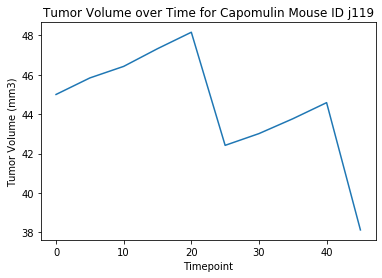

In [31]:
# Retrieve the tumor volume data for a mouse
pick_a_mouse = capomulin_table.loc[capomulin_table['Mouse ID']=='j119']

# Plot the tumor volume for a mouse
plt.plot(pick_a_mouse['Timepoint'],pick_a_mouse['Tumor Volume (mm3)'])
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Tumor Volume over Time for Capomulin Mouse ID j119')
plt.show()

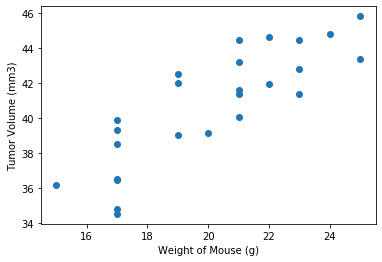

In [32]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

# Determine average tumor volume and mouse weight
mouse_weight = capomulin_table.groupby(capomulin_table["Mouse ID"])["Weight (g)"].mean()
tumor_volume = capomulin_table.groupby(capomulin_table["Mouse ID"])["Tumor Volume (mm3)"].mean()

# Create Scatter Plot of mouse weight vs. tumor volume
plt.scatter(mouse_weight,tumor_volume)
plt.xlabel("Weight of Mouse (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

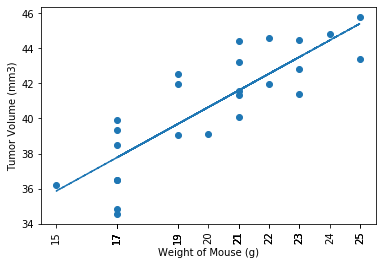

The correlation between mouse weight and tumor volumne is 0.84


In [33]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen

# Determine average tumor volume and mouse weight, using the same information above
mouse_weight = capomulin_table.groupby(capomulin_table["Mouse ID"])["Weight (g)"].mean()
tumor_volume = capomulin_table.groupby(capomulin_table["Mouse ID"])["Tumor Volume (mm3)"].mean()

# Perform a linear regression on mouse weight versus tumor volume
slope, int, r, p, std_err = st.linregress(mouse_weight, tumor_volume)
      
# Create equation of line to represent correlation between mouse weight and tumor volume
fit = slope * mouse_weight + int

# Plot the linear model on top of scatter plot 
plt.scatter(mouse_weight,tumor_volume)
plt.xlabel("Weight of Mouse (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.plot(mouse_weight,fit,"--")
plt.xticks(mouse_weight, rotation=90)
plt.show()

# Caculate correlation coefficient
corr = round(st.pearsonr(mouse_weight,tumor_volume)[0],2)
print(f'The correlation between mouse weight and tumor volumne is {corr}')